In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import numpy as np
from utilities import split_value, split_list, print_tree, trunc, Node, buildKdTree, query
import time
from statistics import mean
import matplotlib.pyplot as plt

In [ ]:
n_lst = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
mean_time_lst_kd = []
mean_time_lst_kdbuild = []
mean_k_lst = []
mean_time_lst_naive = []
mean_k_lst_naive = []
mean_time_lst_kdtree_point = []
mean_time_lst_naive_point = []
rectangle = [0.45, 0.45, 0.55, 0.55]
point_search = [0.5, 0.5, 0.5, 0.5]
for n in n_lst:
    time_lst_kdtree = []
    time_lst_kdbuild = []
    time_lst_naive = []
    time_lst_kdtree_point = []
    time_lst_naive_point = []
    k_lst = []
    k_lst_naive = []

    for i in range(30):
        # measure time for kd tree
        pts_x = np.random.uniform(0, 1, n)
        pts_y = np.random.uniform(0, 1, n)
        points = np.column_stack((pts_x, pts_y))
        root = Node()
        start_time = time.time()
        buildKdTree(root, points)
        time_lst_kdbuild.append(time.time() - start_time)
        start_time = time.time()
        output = query(root, rectangle)
        elapsed_time = time.time() - start_time
        time_lst_kdtree.append(elapsed_time)
        k_lst.append(len(output))
        # measure point search time
        start_time = time.time()
        output = query(root, point_search)
        time_lst_kdtree_point.append(time.time() - start_time)

        # measure time for naive method
        start_time = time.time()
        out_naive = []
        for pt in points:
            if rectangle[0] <= pt[0] <= rectangle[2] and rectangle[1] <= pt[1] <= rectangle[3]:
                out_naive.append(pt)
        elapsed_time = time.time() - start_time
        time_lst_naive.append(elapsed_time)
        k_lst_naive.append(len(out_naive))
        # measure point search time
        start_time = time.time()
        point_in_lst = False
        for pt in points:
          if point_search[0] <= pt[0] <= point_search[2] and point_search[1] <= pt[1] <= point_search[3]:
            point_in_lst = True
            break
        time_lst_naive_point.append(time.time() - start_time)

    mean_time_lst_kd.append(mean(time_lst_kdtree))
    mean_time_lst_kdbuild.append(mean(time_lst_kdbuild))
    mean_k_lst.append(mean(k_lst))
    mean_time_lst_naive.append(mean(time_lst_naive))
    mean_k_lst_naive.append(mean(k_lst_naive))
    mean_time_lst_kdtree_point.append(mean(time_lst_kdtree_point))
    mean_time_lst_naive_point.append(mean(time_lst_naive_point))

In [ ]:
print("Number of points: ", n_lst)
print("Average query time of KD tree: ", mean_time_lst_kd)
print("Average build time of KD tree", mean_time_lst_kdbuild)
print("Average number of points in the query rectangle: ", mean_k_lst)
print("Average query time of naive method: ", mean_time_lst_naive)
print("Average query time of KD tree point search: ", mean_time_lst_kdtree_point)
print("Average query time of naive method point search: ", mean_time_lst_naive_point)

Number of points:  [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
Average query time of KD tree:  [3.315607706705729e-05, 5.7474772135416666e-05, 8.173783620198567e-05, 0.00011646747589111328, 0.0002456029256184896, 0.0003255605697631836, 0.0004959344863891601, 0.000900872548421224, 0.0014301061630249024]
Average build time of KD tree [0.0023659149805704753, 0.007223025957743327, 0.01139226754506429, 0.023250118891398112, 0.07923173109690348, 0.15076730251312256, 0.3302119811375936, 0.6345250527064006, 1.2156311353047689]
Average number of points in the query rectangle:  [1.3, 1.7666666666666666, 5.066666666666666, 9.833333333333334, 21.766666666666666, 43.4, 80.46666666666667, 161.43333333333334, 327.4]
Average query time of naive method:  [6.531874338785807e-05, 0.00014102458953857422, 0.0002759138743082682, 0.000556031862894694, 0.001608427365620931, 0.002772386868794759, 0.005276958147684733, 0.011318325996398926, 0.019576287269592284]
Average query time of KD tree point sea

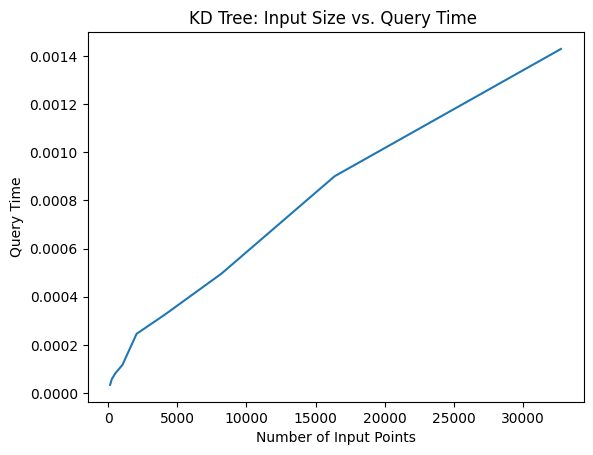

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_kd)
# plt.xscale('log', base=2)
plt.xlabel("Number of Input Points")
plt.ylabel("Query Time")
plt.title("KD Tree: Input Size vs. Query Time ")
plt.show()
plt.close()

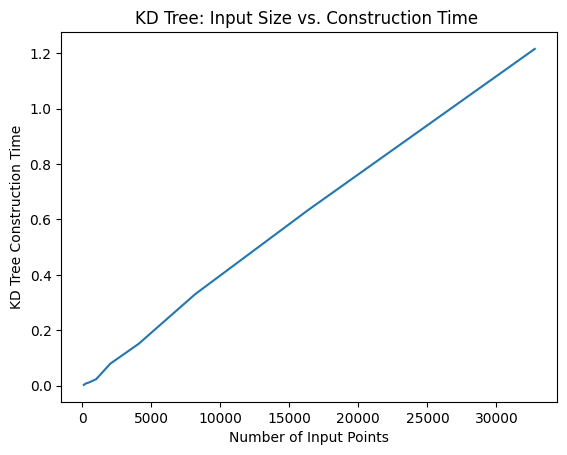

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_kdbuild)
plt.xlabel("Number of Input Points")
plt.ylabel("KD Tree Construction Time")
plt.title("KD Tree: Input Size vs. Construction Time ")
plt.show()
plt.close()

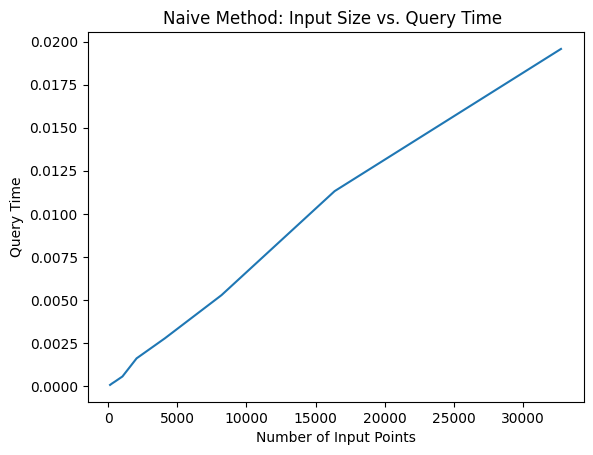

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_naive)
plt.xlabel("Number of Input Points")
plt.ylabel("Query Time")
plt.title("Naive Method: Input Size vs. Query Time ")
plt.show()
plt.close()

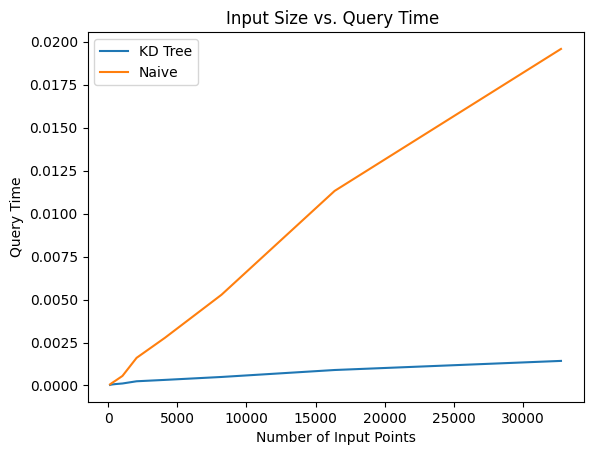

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_kd, label= "KD Tree")
plt.plot(n_lst, mean_time_lst_naive, label = "Naive")
plt.legend()
# plt.xscale('log', base=2)
plt.xlabel("Number of Input Points")
plt.ylabel("Query Time")
plt.title("Input Size vs. Query Time ")
plt.show()
plt.close()

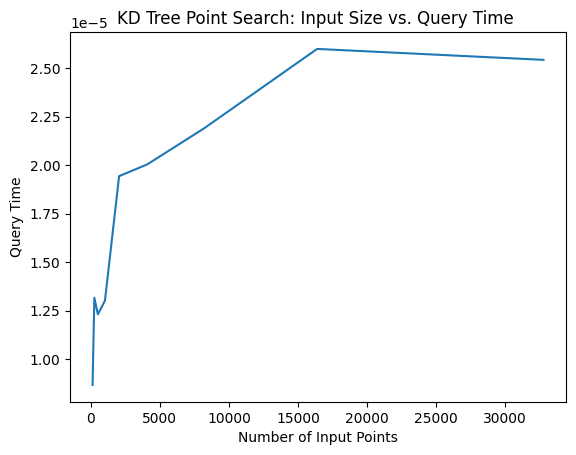

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_kdtree_point)
plt.xlabel("Number of Input Points")
plt.ylabel("Query Time")
plt.title("KD Tree Point Search: Input Size vs. Query Time ")
plt.show()
plt.close()

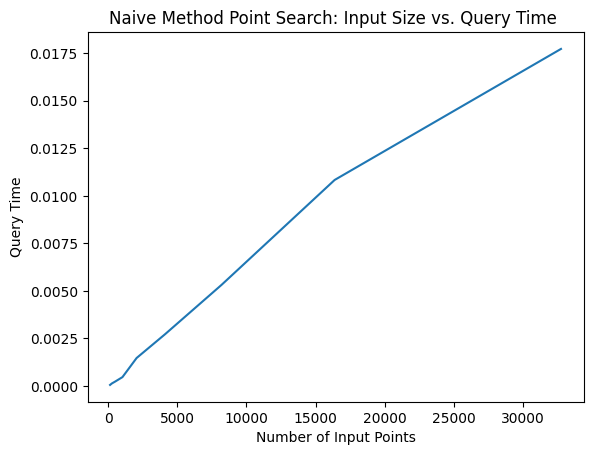

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_naive_point)
plt.xlabel("Number of Input Points")
plt.ylabel("Query Time")
plt.title("Naive Method Point Search: Input Size vs. Query Time ")
plt.show()
plt.close()

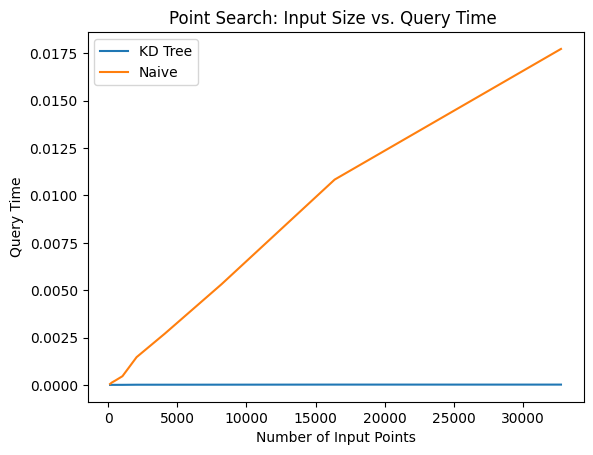

In [ ]:
plt.figure()
plt.plot(n_lst, mean_time_lst_kdtree_point, label= "KD Tree")
plt.plot(n_lst, mean_time_lst_naive_point, label = "Naive")
plt.legend()
# plt.xscale('log', base=2)
plt.xlabel("Number of Input Points")
plt.ylabel("Query Time")
plt.title("Point Search: Input Size vs. Query Time ")
plt.show()
plt.close()